In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


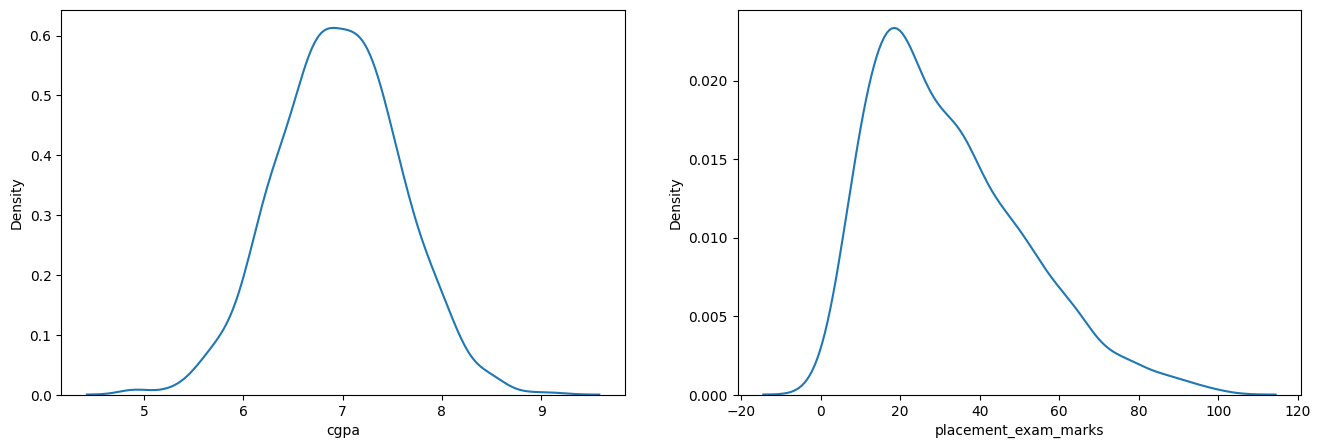

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])
plt.show()

In [4]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

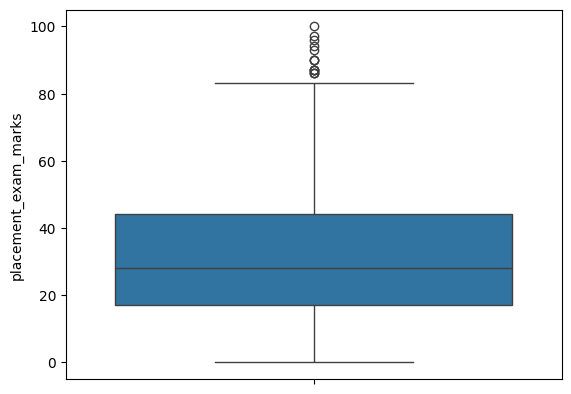

In [5]:
sns.boxplot(df['placement_exam_marks'])
plt.show()

In [6]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [7]:
percentile75

np.float64(44.0)

In [8]:
iqr = percentile75 - percentile25
print(iqr)

27.0


In [9]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [10]:
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Limit: 84.5
Lower Limit: -23.5


### Finding Outliers

In [11]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [12]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### Trimming

In [13]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

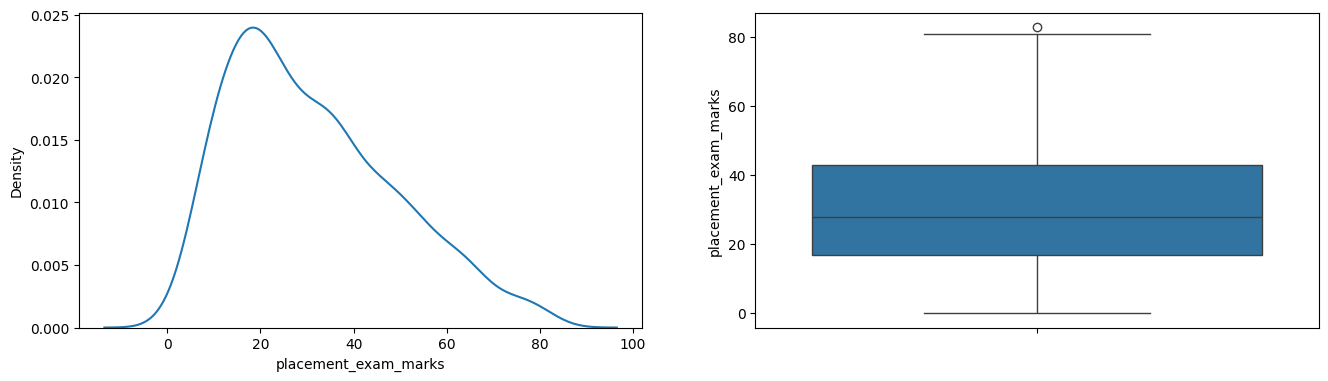

In [14]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.kdeplot(new_df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

### Capping

In [15]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit, 
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [16]:
new_df_cap.shape

(1000, 3)

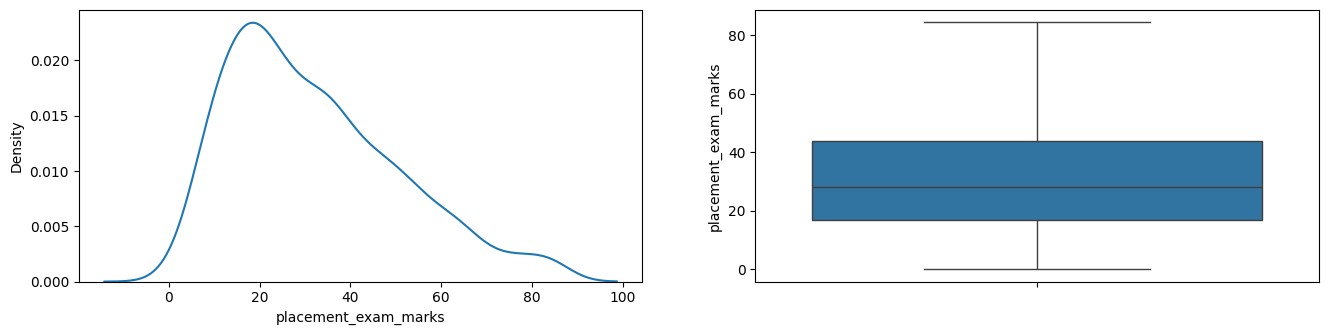

In [17]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.kdeplot(new_df_cap['placement_exam_marks'])
plt.subplot(3,2,2)
sns.boxplot(new_df_cap['placement_exam_marks'])
plt.show()